# Clustering Model

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
plt.rcParams["figure.figsize"] = (15,5)

In [12]:
df = pd.read_csv('dataset/near_30kHz_150kS_8.txt')
len(df)

150000

In [13]:
df.head(10)

,bx1,bx2,bx3,bx4,bx5,bx6,bx7,bx8,bx9,bx10,...,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10
2.4947,2.4914,2.4881,2.4891,2.4881,2.4914,2.4955,2.4959,2.5017,2.5017,2.4456,...,2.3638,2.3515,2.3496,2.3293,2.3422,2.3322,2.3486,2.3577,2.3535,0.2452
2.4963,2.4907,2.4878,2.4897,2.4878,2.4917,2.4955,2.4952,2.5033,2.5017,2.4475,...,2.3638,2.3522,2.3493,2.3303,2.3422,2.3328,2.3477,2.3580,2.3538,0.2478
2.4947,2.4904,2.4881,2.4894,2.4878,2.4910,2.4959,2.4955,2.5017,2.5033,2.4462,...,2.3638,2.3525,2.3502,2.3296,2.3409,2.3335,2.3480,2.3580,2.3548,0.2449
2.4944,2.4917,2.4878,2.4885,2.4888,2.4904,2.4971,2.4959,2.5026,2.5036,2.4485,...,2.3634,2.3515,2.3502,2.3299,2.3406,2.3332,2.3486,2.3580,2.3538,0.2429
2.4940,2.4910,2.4872,2.4891,2.4888,2.4901,2.4952,2.4955,2.5017,2.5094,2.4475,...,2.3644,2.3509,2.3499,2.3296,2.3406,2.3335,2.3477,2.3564,2.3531,0.2391
2.4952,2.4910,2.4878,2.4891,2.4888,2.4917,2.4955,2.4959,2.5026,2.5091,2.4475,...,2.3644,2.3506,2.3506,2.3309,2.3419,2.3325,2.3483,2.3560,2.3535,0.2310
2.4942,2.4910,2.4888,2.4888,2.4888,2.4907,2.4962,2.4959,2.5017,2.5097,2.4475,...,2.3638,2.3506,2.3496,2.3306,2.3422,2.3332,2.3483,2.3583,2.3541,0.2249
2.4934,2.4914,2.4885,2.4881,2.4878,2.4904,2.4962,2.4959,2.5020,2.5104,2.4479,...,2.3660,2.3496,2.3502,2.3332,2.3425,2.3332,2.3486,2.3580,2.3538,0.2214
2.4931,2.4914,2.4875,2.4888,2.4878,2.4910,2.4949,2.4959,2.5010,2.5126,2.4485,...,2.3651,2.3496,2.3519,2.3306,2.3432,2.3332,2.3480,2.3589,2.3531,0.2207
2.4934,2.4914,2.4878,2.4891,2.4868,2.4907,2.4965,2.4959,2.5023,2.5113,2.4488,...,2.3641,2.3499,2.3502,2.3309,2.3412,2.3341,2.3473,2.3583,2.3525,0.2239


## Graphs

### Bx (horizontal) component

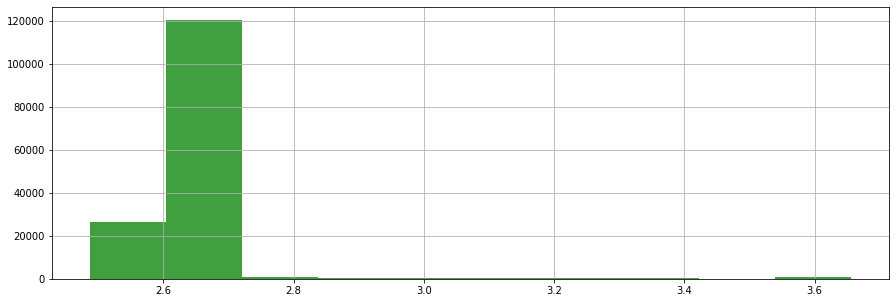

In [14]:
plt.hist(df['bx5'], facecolor='g', alpha=0.75)
plt.grid(True)
plt.show()

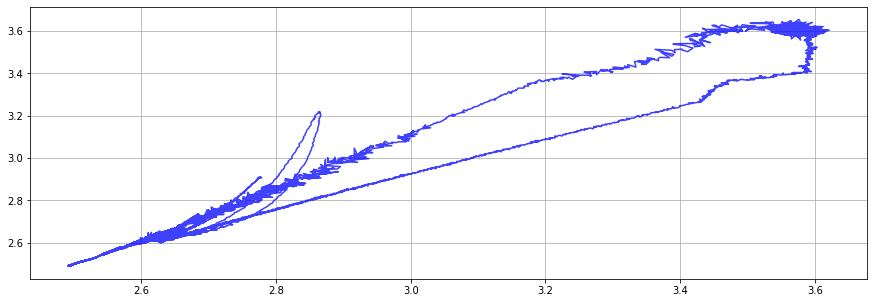

In [15]:
plt.plot(df['bx5'], color='b', alpha=0.75)
plt.grid(True)
plt.show()

### Bz1 (vertical) component

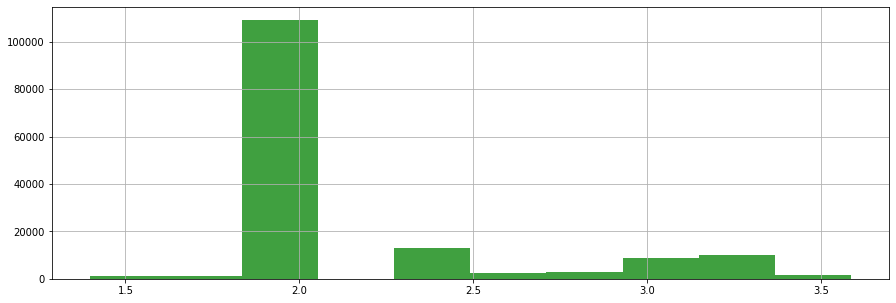

In [16]:
plt.hist(df['bz1v5'], facecolor='g', alpha=0.75)
plt.grid(True)
plt.show()

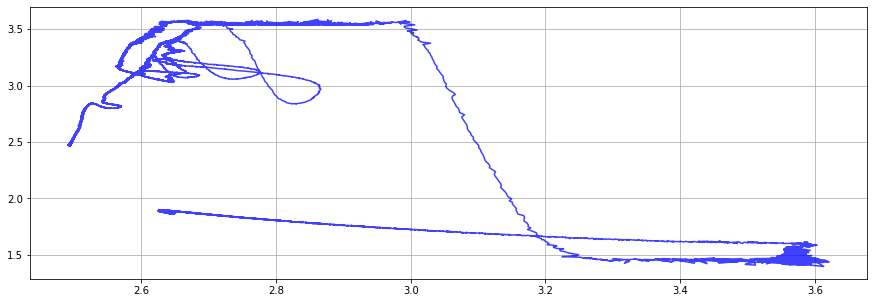

In [17]:
plt.plot(df['bz1v5'], color='b', alpha=0.75)
plt.grid(True)
plt.show()

### Differentiation

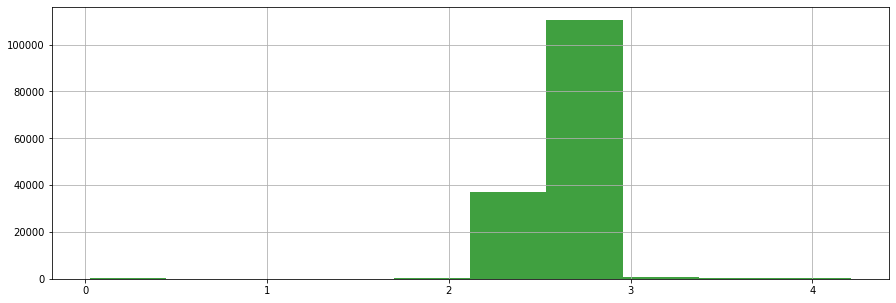

In [18]:
plt.hist(df['g5'], facecolor='g', alpha=0.75)
plt.grid(True)
plt.show()

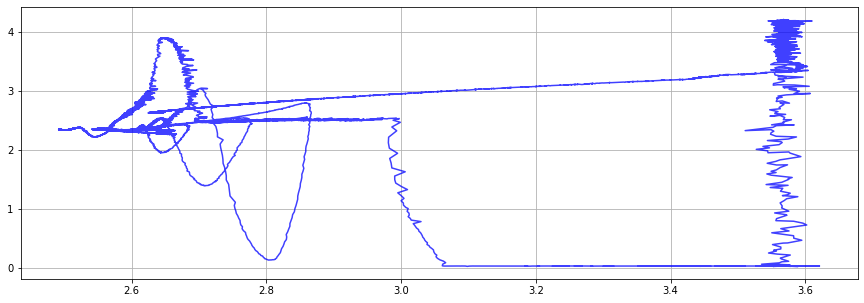

In [19]:
plt.plot(df['g5'], color='b', alpha=0.75)
plt.grid(True)
plt.show()

## Model creation

In [22]:
from sklearn.cluster import KMeans, MiniBatchKMeans, OPTICS

In [23]:
# preparing data
x = df[['bx5']].to_numpy()
x.reshape(-1,1)
x

array([[2.4914],
       [2.4917],
       [2.491 ],
       ...,
       [2.6209],
       [2.6225],
       [2.6215]])

### Algorithms

In [24]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(x)

In [25]:
mbmeans = MiniBatchKMeans(n_clusters=5, batch_size=64, random_state=42).fit(x)

In [27]:
kmeans_predicted = kmeans.predict(x)
mbmeans_predicted = mbmeans.predict(x)

In [29]:
centers_k = kmeans.cluster_centers_
centers_kmb = mbmeans.cluster_centers_

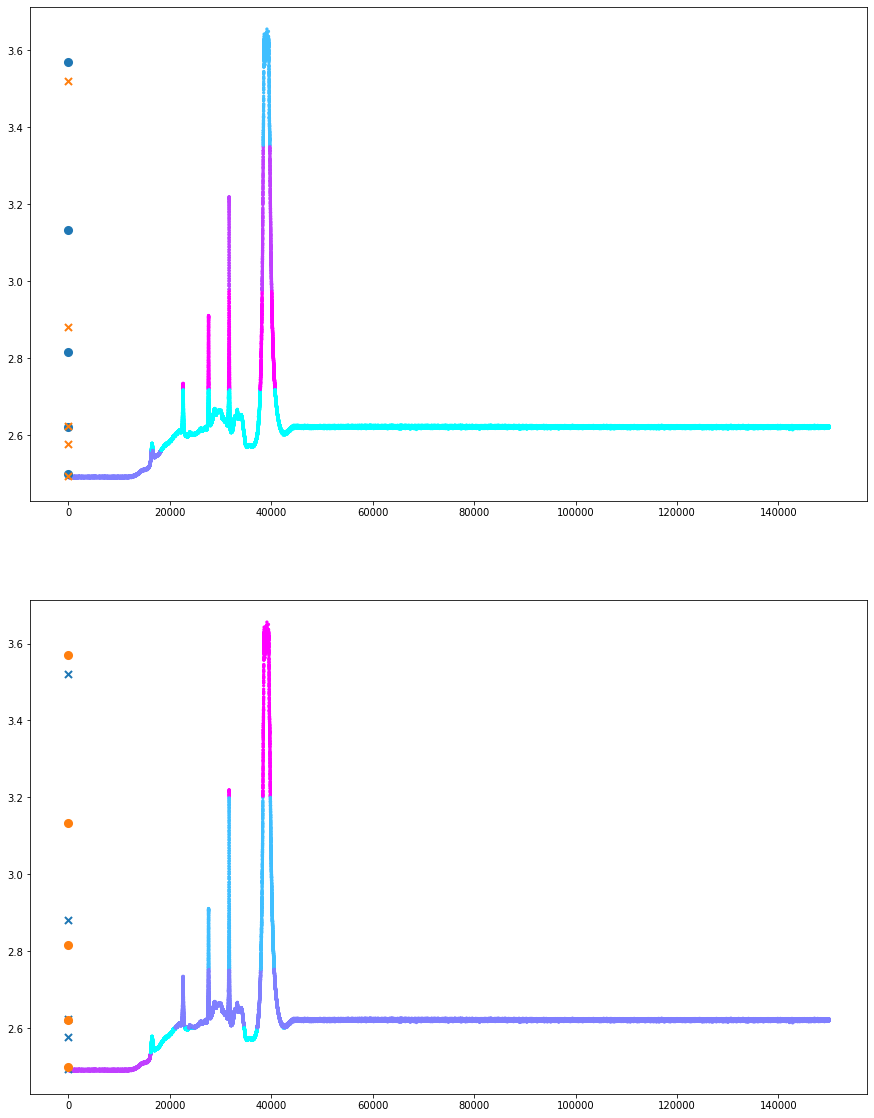

In [31]:
fig, ax = plt.subplots(2, 1,figsize=(15, 20))

ax[0].scatter(range(len(x)), x, c=kmeans_predicted, s=5, cmap='cool')
ax[0].scatter(range(len(centers_k)), centers_k, s=50, linewidths=2, cmap='cool')
ax[0].scatter(range(len(centers_kmb)), centers_kmb,  marker='x', s=50, linewidths=2, cmap='cool')

ax[1].scatter(range(len(x)), x, c=mbmeans_predicted, s=5, cmap='cool')
ax[1].scatter(range(len(centers_kmb)), centers_kmb,  marker='x', s=50, linewidths=2, cmap='cool')
ax[1].scatter(range(len(centers_k)), centers_k, s=50, linewidths=2, cmap='cool')

## Save model

In [34]:
pickle.dump(kmeans, open('models/model.p', 'wb'))